In [ ]:
import keras
keras.__version__


'2.8.0'

In [ ]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

In [ ]:
from keras.datasets import reuters
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 64

print('Loading data...')
(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Loading data...
2121728/2110848 [==============================] - 0s 0us/step
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
input_train shape: (8982, 500)
input_test shape: (2246, 500)
y_train shape: (8982,)
y_test shape: (2246,)


In [ ]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 46)
y_test = np_utils.to_categorical(y_test, 46)

In [ ]:

y_test.shape

(2246, 46)

In [ ]:
import tensorflow as tf
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 9e-1:
            self.model.stop_training = True

In [ ]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs["acc"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
my_callback = MyThresholdCallback(threshold=0.9)


history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.3, verbose=2,callbacks=[my_callback])

Epoch 1/10
50/50 - 45s - loss: 2.4954 - acc: 0.3498 - val_loss: 2.3063 - val_acc: 0.3848 - 45s/epoch - 900ms/step
Epoch 2/10
50/50 - 41s - loss: 2.1040 - acc: 0.4633 - val_loss: 2.2852 - val_acc: 0.3959 - 41s/epoch - 827ms/step
Epoch 3/10
50/50 - 42s - loss: 1.7498 - acc: 0.5704 - val_loss: 2.3724 - val_acc: 0.4026 - 42s/epoch - 836ms/step
Epoch 4/10
50/50 - 41s - loss: 1.2858 - acc: 0.6909 - val_loss: 2.6711 - val_acc: 0.3777 - 41s/epoch - 827ms/step
Epoch 5/10
50/50 - 42s - loss: 0.9332 - acc: 0.7753 - val_loss: 2.6163 - val_acc: 0.4115 - 42s/epoch - 847ms/step
Epoch 6/10
50/50 - 42s - loss: 0.6919 - acc: 0.8306 - val_loss: 2.7815 - val_acc: 0.4071 - 42s/epoch - 831ms/step
Epoch 7/10
50/50 - 41s - loss: 0.5147 - acc: 0.8788 - val_loss: 3.1613 - val_acc: 0.3443 - 41s/epoch - 829ms/step
Epoch 8/10
50/50 - 42s - loss: 0.3858 - acc: 0.9084 - val_loss: 2.8813 - val_acc: 0.3970 - 42s/epoch - 830ms/step


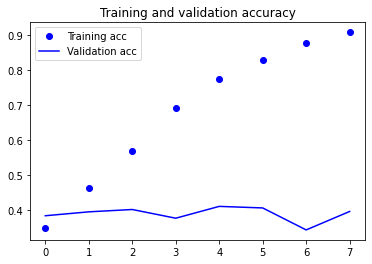

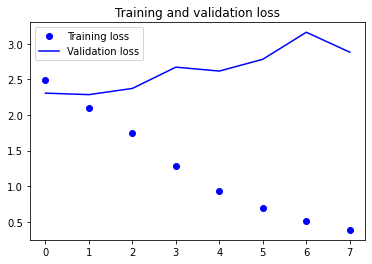

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()